# Symptom Severity Forecasting
This notebook generates 30-day patient-specific symptom severity forecasts.
- Tracks **Fatigue, Weakness, Headache**
- Provides a stacked area chart
- Forecasts are **patient specific**


In [14]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [16]:
# Load patient dataset
patient_data = pd.read_csv("sample_patients.csv")

# Show first 5 rows
patient_data.head()


,PatientID,Age,Gender,Weight,Height,BloodType,ThalassemiaType,LastTransfusionDate,HemoglobinLevel,AvgHemoglobinLast3,...,SleepQuality,HydrationLevel,PredictedHemoglobinNext,NextTransfusionDatePredicted,AIConfidence (%),RiskScore,HealthTipsGenerated,ActivityLevel,DigitalTwinID,Notes
0,P001,12,M,35,140,A+,Beta,2025-08-15,7.8,8.0,...,8,Medium,8.5,2025-09-05,88,15,Increase hydration; Maintain diet,Medium,P001,Regular chelation therapy
1,P002,8,F,25,120,B-,Beta,2025-08-12,6.9,7.2,...,6,Low,7.5,2025-09-01,82,20,Focus on sleep; Monitor fatigue,Low,P002,Occasional missed doses
2,P003,15,M,45,150,O+,Beta,2025-08-18,8.2,8.0,...,9,High,8.8,2025-09-12,90,10,Maintain activity; Continue therapy,High,P003,"Good adherence, active lifestyle"
3,P004,10,F,30,130,AB-,Beta,2025-08-10,7.0,7.1,...,7,Medium,7.6,2025-09-02,85,18,Improve diet; Hydration tips,Medium,P004,Needs follow-up on diet
4,P005,13,M,40,145,A-,Beta,2025-08-17,7.5,7.8,...,8,Medium,8.2,2025-09-07,87,14,Monitor activity; Continue medication,Medium,P005,"Stable, regular check-ups"


In [17]:
# Select latest patient row
patient_id = "P001"
patient_row = patient_data[patient_data["PatientID"] == patient_id].iloc[0]

patient_row


PatientID                                                                    P001
Age                                                                            12
Gender                                                                          M
Weight                                                                         35
Height                                                                        140
BloodType                                                                      A+
ThalassemiaType                                                              Beta
LastTransfusionDate                                                    2025-08-15
HemoglobinLevel                                                               7.8
AvgHemoglobinLast3                                                            8.0
TransfusionIntervalDays                                                        21
TransfusionVolume                                                             350
IronLevel       

In [18]:
# Map symptom text to numeric severity
symptom_map = {"None": 0, "Mild": 3, "Moderate": 5, "Severe": 8}

fatigue_start = symptom_map.get(str(patient_row["FatigueLevel"]), 5)
weakness_start = symptom_map.get(str(patient_row["WeaknessLevel"]), 5)
headache_start = symptom_map.get(str(patient_row["HeadacheLevel"]), 5)

fatigue_start, weakness_start, headache_start


(5, 3, 8)

In [19]:
# Generate 30 days from today
days = pd.date_range(datetime.today(), periods=30)

# Random walk around baseline
fatigue = np.clip(fatigue_start + np.random.normal(0, 1, 30).cumsum()/10, 0, 10)
weakness = np.clip(weakness_start + np.random.normal(0, 1, 30).cumsum()/10, 0, 10)
headache = np.clip(headache_start + np.random.normal(0, 1, 30).cumsum()/10, 0, 10)

forecast_df = pd.DataFrame({
    "Date": days,
    "Fatigue": fatigue,
    "Weakness": weakness,
    "Headache": headache
})

forecast_df.head()


,Date,Fatigue,Weakness,Headache
0,2025-08-23 11:04:31.363640,5.049671,2.939829,7.952083
1,2025-08-24 11:04:31.363640,5.035845,3.125057,7.933517
2,2025-08-25 11:04:31.363640,5.100614,3.123707,7.822883
3,2025-08-26 11:04:31.363640,5.252917,3.017936,7.703263
4,2025-08-27 11:04:31.363640,5.229501,3.100191,7.784515


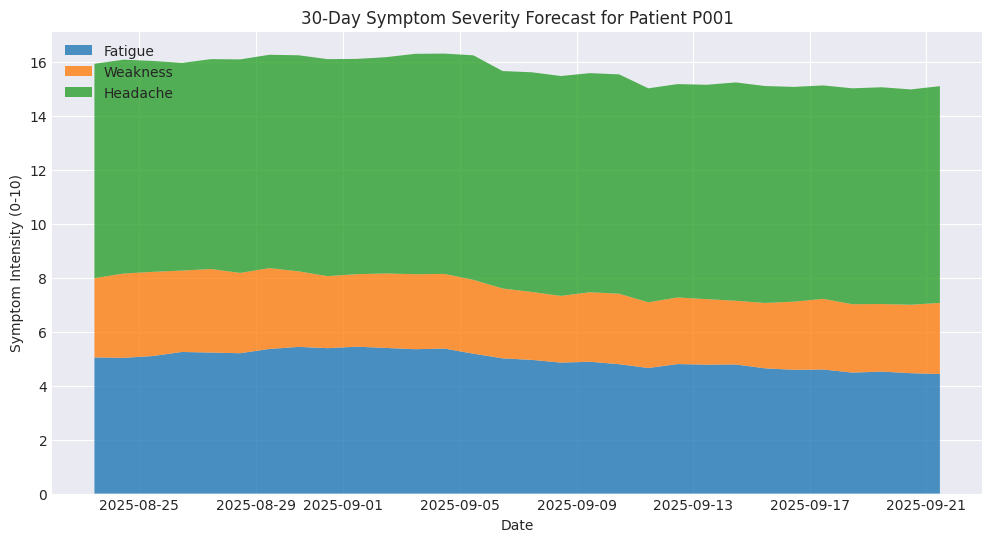

In [20]:
plt.figure(figsize=(12,6))

plt.stackplot(
    forecast_df["Date"],
    forecast_df["Fatigue"],
    forecast_df["Weakness"],
    forecast_df["Headache"],
    labels=["Fatigue", "Weakness", "Headache"],
    alpha=0.8
)

plt.legend(loc="upper left")
plt.title(f"30-Day Symptom Severity Forecast for Patient {patient_id}")
plt.ylabel("Symptom Intensity (0-10)")
plt.xlabel("Date")
plt.show()
